# Project: tmdb movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this dataset we will investigate tmdb movies dataset and try to answer some questions like
Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?
Do movies with higher revenue, budget and popularity receive higher votes?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First we will find some general properties of the dataset

The number of rows and columns, if there are any duplicated rows, null values and data types. 

In [2]:
df = pd.read_csv('tmdb-movies.csv', index_col='id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [5]:
df.duplicated().sum()

1

In [6]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The data consists of 10866 rows and 20 columns and contains 1 duplicated row.

### Data Cleaning

In this step we will clean the data to make it ready for EDA.

let's first drop some columns that we won't need

In [7]:
df.drop(columns=['cast', 'homepage', 'director', 'tagline', 'keywords', 'production_companies', 'overview', 'imdb_id'], inplace=True)

In [8]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

Now let's remove duplicated rows

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().any()

False

In [11]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

No we will drop null values

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(10842, 12)

In [14]:
df.isnull().sum().any()

False

In [15]:
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

Now we fix wrong data types

In [16]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%m/%d/%y")

In [17]:
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [18]:
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


some movies has runtime of zero, so will change it's runtime value to the average.

<a id='eda'></a>
## Exploratory Data Analysis

### What is the distribution of the ratings?

First we need to normalize votes since moveis have different number of votes.
>source of the formula: https://stackoverflow.com/questions/8542391/how-to-normalize-reviews-based-on-score

In [19]:
med_vote_count = df.vote_count.median()
movies_vote_avg = df.vote_average.mean()
avg_vote_adj = (df["vote_count"] / (df["vote_count"] + med_vote_count)) * df["vote_average"] + (med_vote_count / (df["vote_count"] + med_vote_count)) * movies_vote_avg
avg_vote_adj.head()

id
135397    6.496431
76341     7.093125
262500    6.295081
140607    7.489121
168259    7.283120
dtype: float64

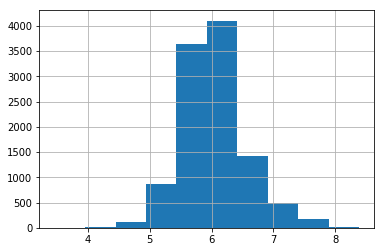

In [20]:
avg_vote_adj.hist();

### Do movies with higher revenue receive higher rating?

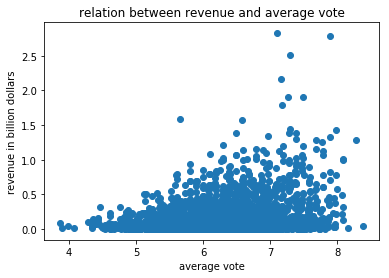

In [21]:
rev_mask = df["revenue_adj"] != 0
new_rev = df[rev_mask]["revenue_adj"]/1e9
plt.title("relation between revenue and average vote")
plt.xlabel("average vote")
plt.ylabel("revenue in billion dollars")
plt.scatter(avg_vote_adj[rev_mask], new_rev);

### Do movies with higher budget receive higher rating?

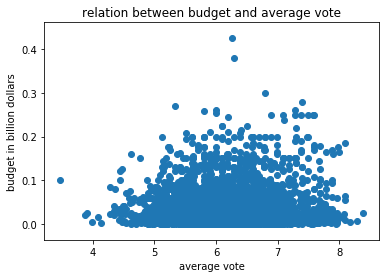

In [22]:
budget_mask = df["budget_adj"] != 0
new_budget = df[budget_mask]["budget"]/1e9
plt.title("relation between budget and average vote")
plt.xlabel("average vote")
plt.ylabel("budget in billion dollars")
plt.scatter(avg_vote_adj[budget_mask], new_budget);

### Do movies with higher popularity receive higher rating?

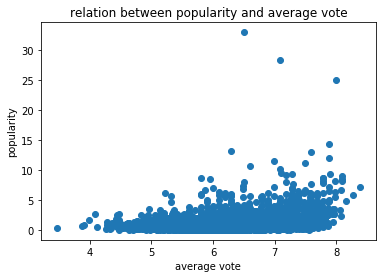

In [23]:
plt.title("relation between popularity and average vote")
plt.xlabel("average vote")
plt.ylabel("popularity")
plt.scatter(avg_vote_adj, df["popularity"]);

### What is the statistics of runtime for a movie?

In [24]:
df.runtime.describe()

count    10842.000000
mean       102.138443
std         31.294612
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

### Do movies with higher popularity receive higher number of votes?

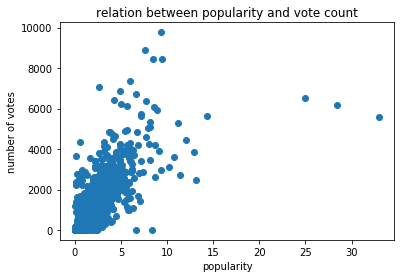

In [25]:
plt.title("relation between popularity and vote count")
plt.xlabel("popularity")
plt.ylabel("number of votes")
plt.scatter(df["popularity"], df["vote_count"]);

### What genres are popular through years?

We need first to find the main genre by splitting the genres column

In [26]:
df['main_genre'] = df.genres.str.split('|', expand=True)[0]

In [27]:
group = df.groupby(["release_year", "main_genre"]).main_genre.count()
year_max_val = group.groupby("release_year").max()

### What are the properties associated with high revenue movies?

In [28]:
high_revenue = df.query("revenue_adj >= {}".format(df[df["revenue_adj"] != 0]["revenue_adj"].median()))["revenue_adj"]/1e9

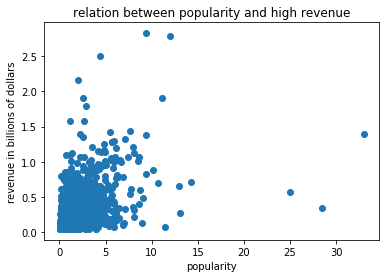

In [29]:
plt.title("relation between popularity and high revenue")
plt.xlabel("popularity")
plt.ylabel("revenue in billions of dollars")
plt.scatter(df.loc[high_revenue.index]["popularity"], high_revenue);

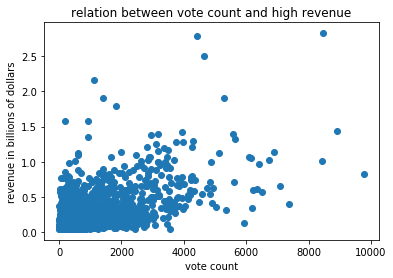

In [30]:
plt.title("relation between vote count and high revenue")
plt.xlabel("vote count")
plt.ylabel("revenue in billions of dollars")
plt.scatter(df.loc[high_revenue.index]["vote_count"], high_revenue);

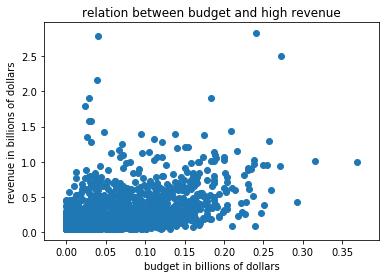

In [31]:
plt.title("relation between budget and high revenue")
plt.xlabel("budget in billions of dollars")
plt.ylabel("revenue in billions of dollars")
plt.scatter(df.loc[high_revenue.index]["budget_adj"]/1e9, high_revenue);

<a id='conclusions'></a>
## Conclusions

1. There is **no correlation between *budget* and *average vote***, which means that budget doesn't affect the average vote and there are movies with low budget that have high average vote.
2. There is **weak positive correlation between *popularity* and *average vote***, which means that popularity slightly affects the average vote. As the popularity of the movie increases that slightly increase the average vote and vice versa.
3. There is **strong positive correlation between *popularity* and *vote count***. When popularity increases the number of votes increases and vice versa.
4. Properties associated with high revenue movies:
    1. There is **positive correlation between *higher revenue* and *average vote***. Movies with higher revenue receive higher vote.
    2. There is **positive correlation between *higher revenue* and *popularity***. Movies with higher revenue have hihger popularity.
    3. There is **positive correlation between *higher revenue* and *vote count***. Movies with higher revenue have higher number of votes.
    4. There is **positive correlation between *higher revenue* *budget***. Movies with higher revenue have higher budget.